In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import OneHotEncoder

### Data loading and cleaning

In [2]:
# load both the train and test data set
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
# check on dimensions
print(train_set.shape, test_set.shape)

(1460, 81) (1459, 80)


In [4]:
# Combine the train and test data set before data wrangling
full_set = train_set.merge(test_set, how = 'outer')

In [5]:
# Remove the Id column
full_set.drop('Id', axis = 1, inplace = True)

In [6]:
# use descrbie() to get more insight of the data distribution
full_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


From the description, we notice some outliers such as extremely large LotFontage. However, it might be possible for some super mansions. Let's keep them for now. One outlier that is wrong for sure is the 2207 in the GarageYrBlt. It is very likely that this value should be 2007 instead. Let's replace it

In [7]:
full_set.GarageYrBlt.replace(2207,2007, inplace = True)

In [8]:
full_set.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0


Now try to deal with the missing value by first checking which columns have the missing value

In [9]:
# list down the missing value and its percentage 
missing = pd.concat([full_set.isna().sum(), full_set.isna().sum()/len(full_set)], axis = 1)
missing.columns = ['# of NaN','Percentage']
missing.sort_values('Percentage',ascending = False, inplace = True)
missing.head(40)

,# of NaN,Percentage
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageQual,159,0.054471


Some missing values actually mean that the house doesn't have that specific features. We can replace those missing values with None

In [10]:
# The list of the meaningful missing values
None_list = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageFinish','GarageCond','GarageType','GarageType','GarageQual','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','MasVnrType']

In [11]:
# Replace the missing value with None

for feature in None_list:
    full_set[feature].fillna('None', inplace = True)

In [12]:
# Check out the remaining missing value
missing2 = pd.concat([full_set.isna().sum(), 100*full_set.isna().sum()/len(full_set)], axis = 1)
missing2.columns = ['# of missing values','Percentage']
missing2.sort_values('Percentage', ascending = False, inplace = True)
missing2.head(40)

,# of missing values,Percentage
SalePrice,1459,49.982871
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
MasVnrArea,23,0.787941
MSZoning,4,0.137033
Utilities,2,0.068517
Functional,2,0.068517
BsmtFullBath,2,0.068517
BsmtHalfBath,2,0.068517
Exterior1st,1,0.034258


Some missing values can be replaced by 0 to indicate that the house doesn't have that specific features

In [13]:
# Replace the following missing value with 0
no_such_feature = ['GarageYrBlt','GarageArea','MasVnrArea','GarageCars','BsmtHalfBath','BsmtFullBath','BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtUnfSF']

full_set.update(full_set[no_such_feature].fillna(0))

In [14]:
full_set.isna().sum().sort_values(ascending = False).head(20)

SalePrice       1459
LotFrontage      486
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
KitchenQual        1
Exterior1st        1
Electrical         1
SaleType           1
BsmtFinSF1         0
BsmtFinType1       0
RoofMatl           0
BsmtCond           0
BsmtQual           0
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
MasVnrType         0
dtype: int64

For the missing values in LotFrontage, let's replace it with the mean value in the specific neighborhood the house belongs

In [15]:
full_set['LotFrontage'] = full_set.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

For the rest of the missing values, replace them with the most common value in its corresponding neighborhood

In [16]:
# Replace the missing values in the list below with the most common value
common_list = ['MSZoning','Utilities','Functional','KitchenQual','Exterior2nd','Exterior1st','SaleType','Electrical']

for feature in common_list:
    full_set[feature] = full_set.groupby('Neighborhood')[feature].transform(lambda x: x.fillna(x.mode()[0]))

In [17]:
# Check the dataset again to make sure all the missing values have been dealt with
full_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [21]:
# review the cleaned data set
full_set.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


### Exploratory data analysis

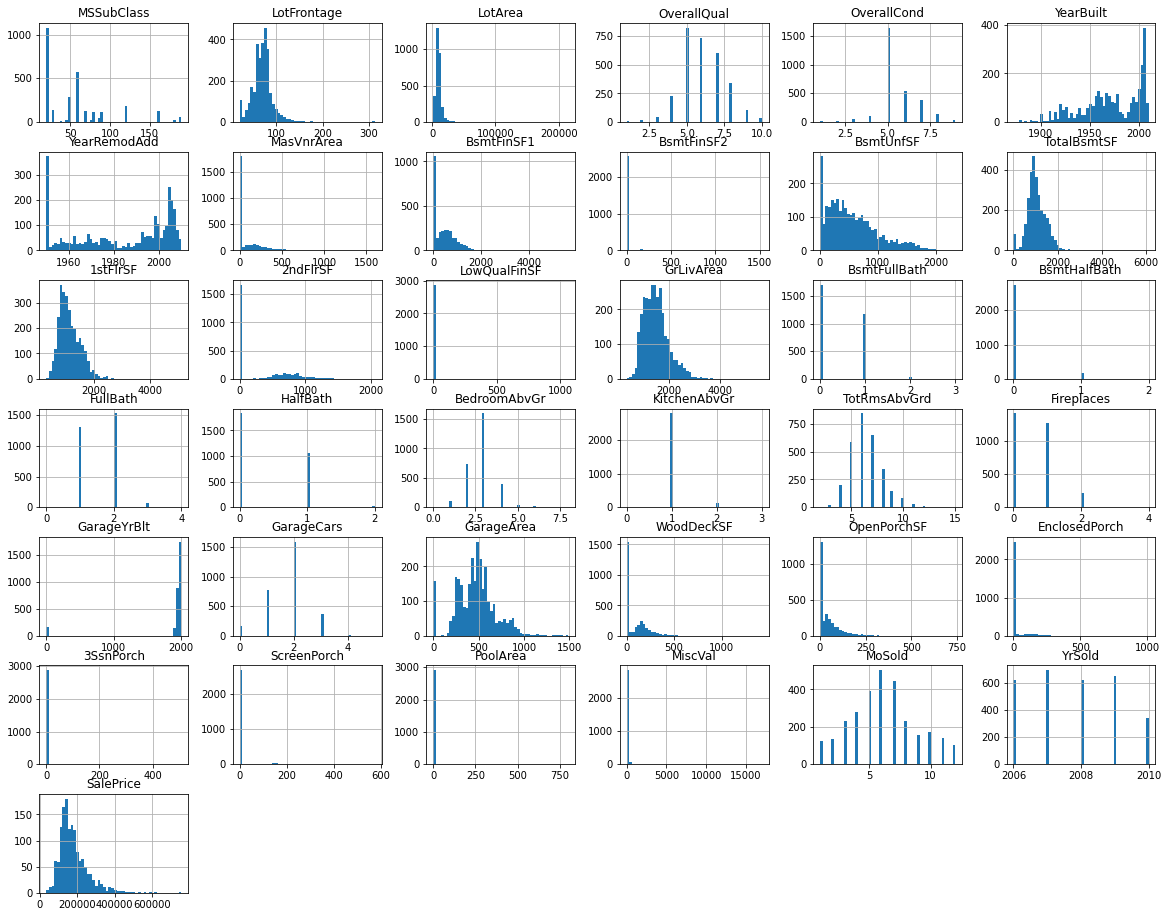

In [22]:
#check out the histogram of the clean data set
_= full_set.hist(bins = 50, figsize = (20,16))

In [23]:
# separate the training set 
df_train = full_set[~full_set.SalePrice.isnull()]
print(df_train.shape)
df_train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


Quickly take a look at the histogram for all the parameters

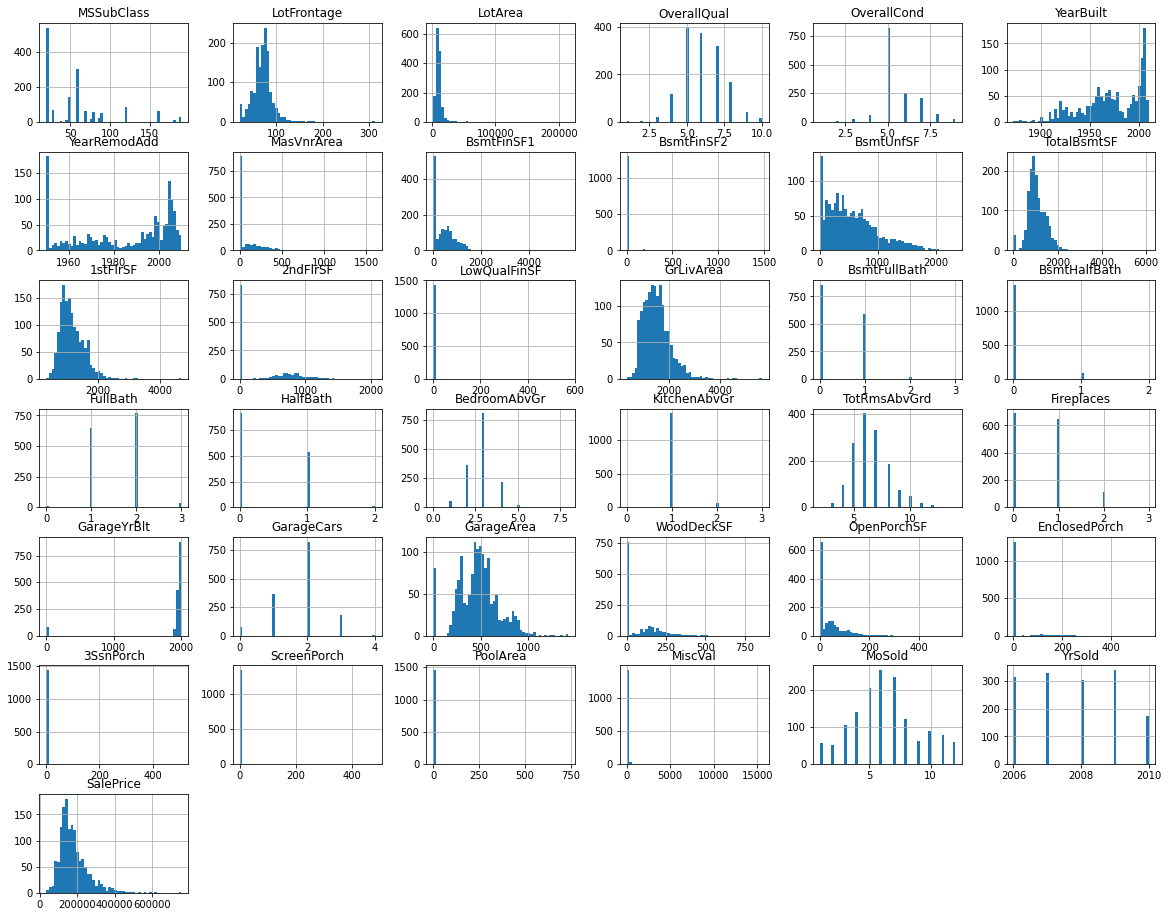

In [24]:
_= df_train.hist(bins = 50, figsize = (20,16))

Some data show skew and we may need to do log transform later. Some data show possible outliers. Will need to take a look later

Now let's be a little more quatitative and take a look at the correlation between each paramter

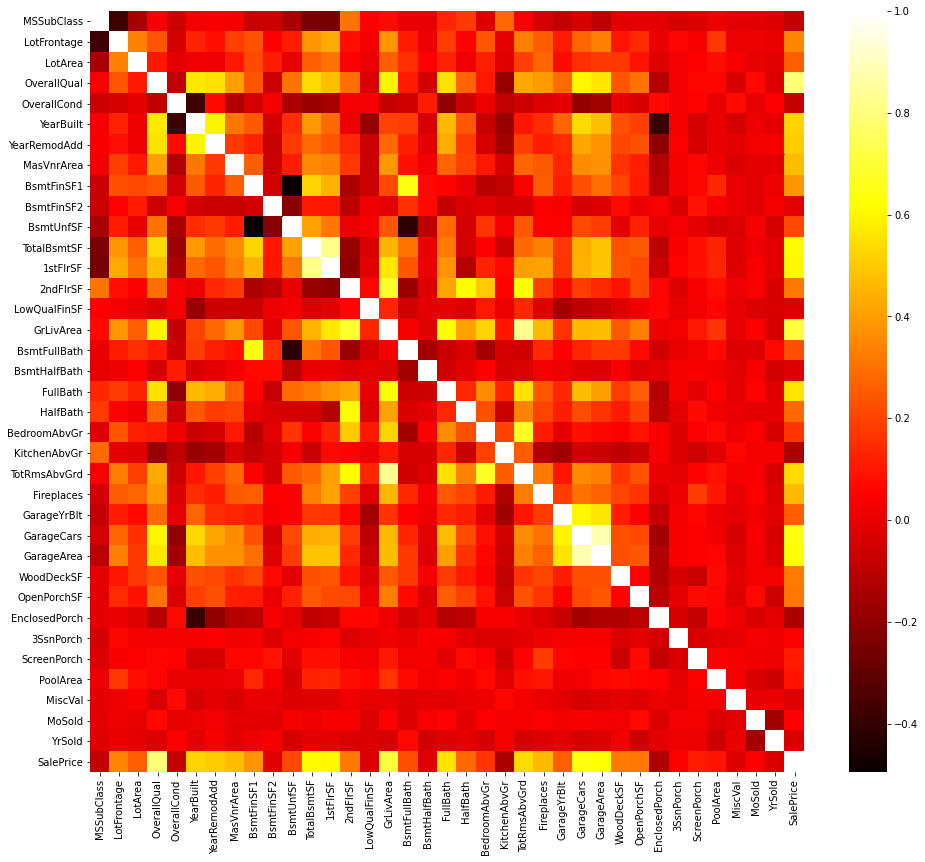

In [25]:
# plot the heatmap for the variables
corr = df_train.corr()
plt.figure(figsize=(16,14))
_= sns.heatmap(corr, cmap = 'hot')

From the heatmap, we can see some variables are highly correlated with each other. For example TotalBsmtSF has high correlation with 1stFlrSF. This is understandable since the basement area should be very close to the first floor area. Similarly, GarageCars has high correlation to GarageArea since we need more garage area if we want to park more cars. We may only need to consider a single variable instead of two highly correlated variables during modeling stage

In [26]:
# get the actual correlation values between different variables and the SalePrice
cor_list = corr[['SalePrice']].abs().sort_values('SalePrice', ascending = False)
cor_list

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


SalePrice is highly correlated to the OverallQual of the house and the GrLivArea, which is understandable. Strangely the house price has small correlation to the OverallCond of the house. Next let's take a look at the scatter plot between different variables and the SalePrice

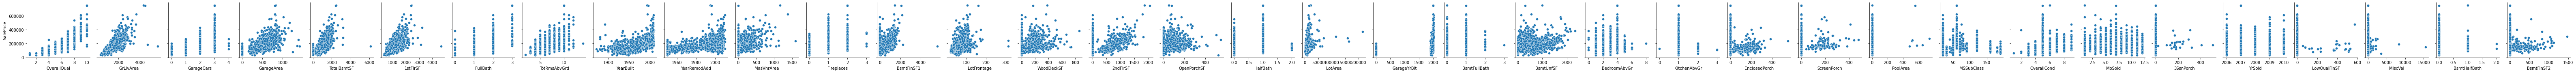

In [27]:
# scatter plot between variables and SalePrice
num_var = cor_list.index
_=sns.pairplot(df_train[num_var],x_vars = num_var[1:], y_vars = 'SalePrice',diag_kind = None)

### Outliers
We can see some outliers for GrLivArea, TotalBsmtSF, 1stFlrSF, BsmtFinSF1, LotFrontage, let's remove them

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

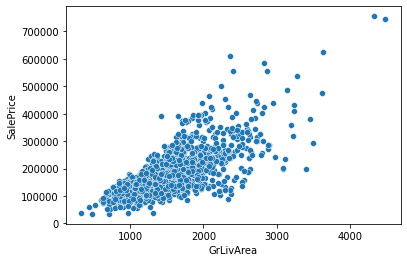

In [28]:
# Remove outliers for GrLivArea
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice'] < 300000)].index)
# replot to confirm
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

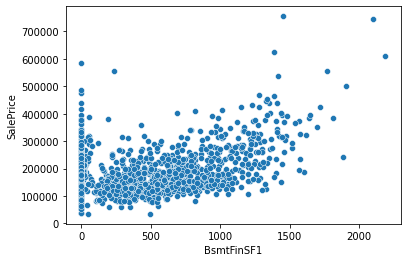

In [29]:
# Remove outlier in BsmtFinSF1
df_train = df_train[df_train['BsmtFinSF1']<4000]
# replot to confirm
sns.scatterplot(x = 'BsmtFinSF1', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

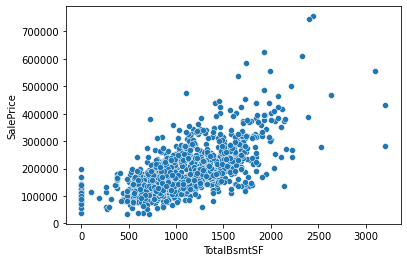

In [30]:
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

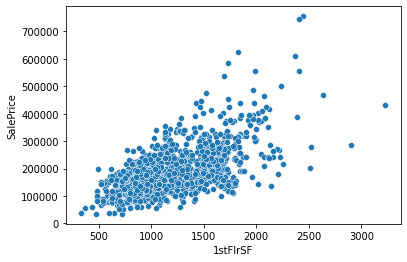

In [31]:
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', data = df_train)

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

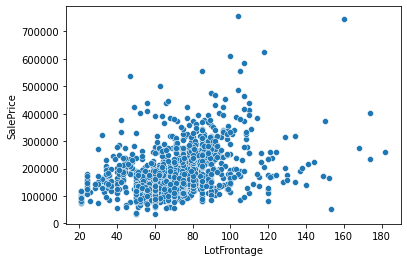

In [32]:
df_train = df_train[df_train['LotFrontage']<300]
sns.scatterplot(x = 'LotFrontage', y = 'SalePrice', data = df_train)

Take a look at the histogram again

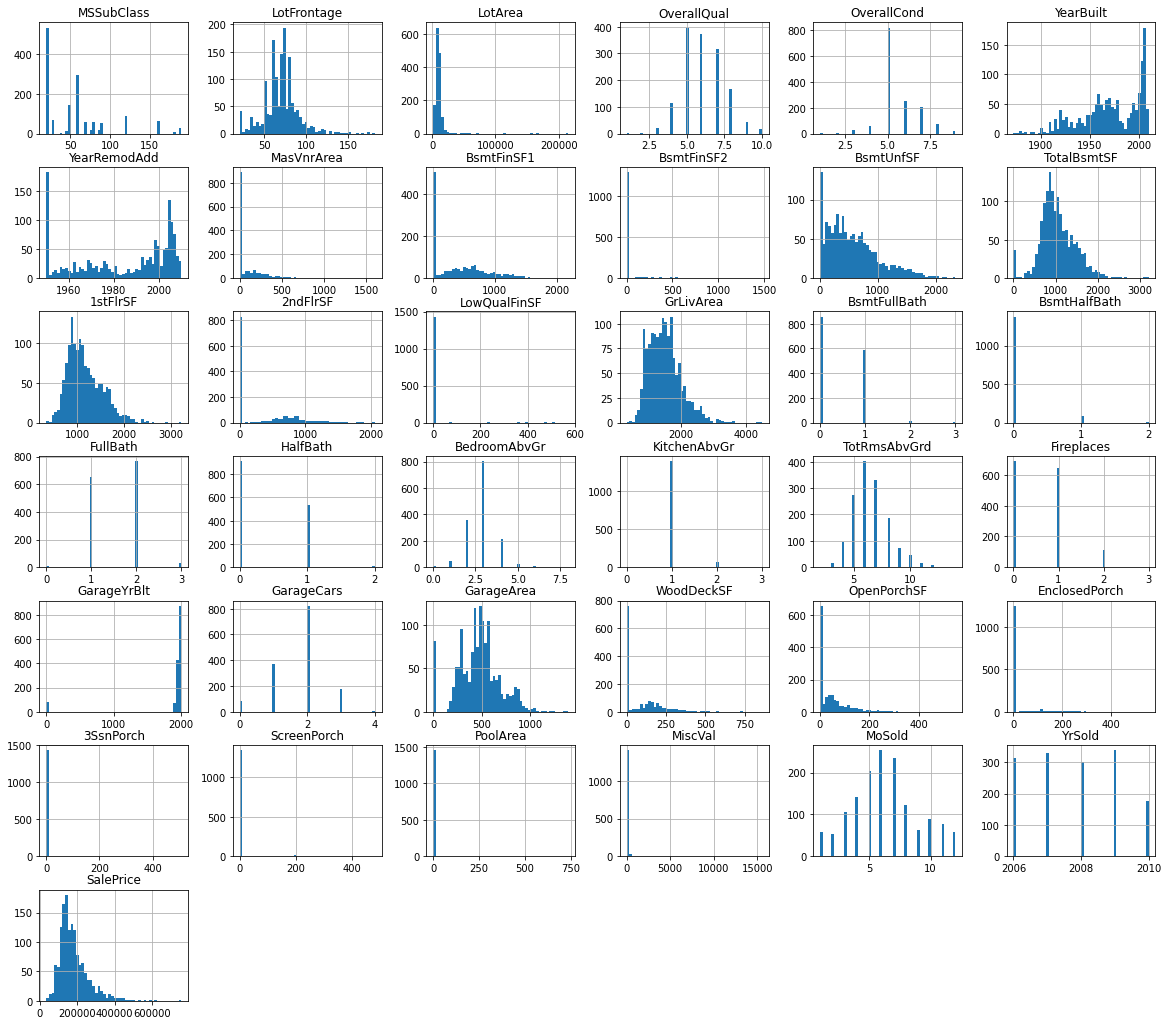

In [33]:
_= df_train.hist(bins = 50, figsize = (20,18))

### More visualization with categorical variables

In [34]:
# get the list for categorical data
cat = []
for i in df_train.columns:
    if df_train[i].dtypes == 'object':
        cat.append(i)

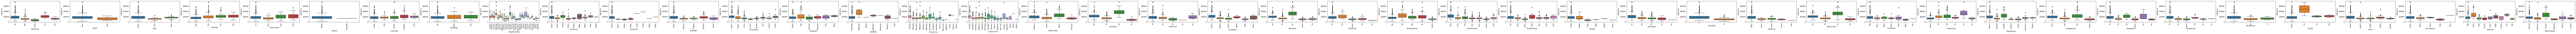

In [35]:
fig, axs = plt.subplots(1,len(cat), figsize=(7*len(cat),2.5))

for i, col_name in enumerate(cat):
    g = sns.boxplot(data=df_train, x=col_name, y="SalePrice", ax = axs[i])
    plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

For examples, MSZoning variable: RL showed more outliers than RM than RH, this may be due to that it is more likely to have mansion style house in the lower residential density region. Neighborhood: different neighborhood also showed different house price. Condition1: adjacent to artery street or railroad normally have lower house price probably due to the noisy enviroment. BldgType: it is more likely to have high sale price for single family style. We can make similar observation and comments for many other variables. It should be more clear in the modeling stage.

### Normality
Next let's check out the normality of the sale price

C:\Users\Yiming Lai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


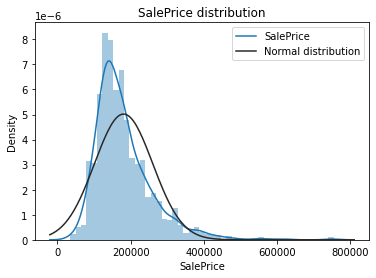

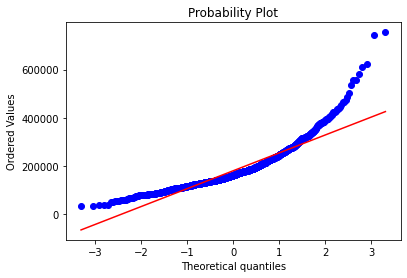

In [36]:
# take a look at the sale price distribution
_ = sns.distplot(df_train['SalePrice'], fit = norm)
plt.title('SalePrice distribution')
plt.legend(['SalePrice','Normal distribution'])

fig = plt.figure()
_= stats.probplot(df_train['SalePrice'], plot = plt)

plt.show()

From the histogram and the QQ plot we can see the sale price is not normaly distributed and has some positve skew. Let's also get the skewness and kurtosis values

In [37]:
print('Skewness =', df_train.SalePrice.skew(),',Kurtosis =',df_train.SalePrice.kurt())

Skewness = 1.8830684855553144 ,Kurtosis = 6.528012973216978


We can do log-transform on the sale price to fix the skew

C:\Users\Yiming Lai\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


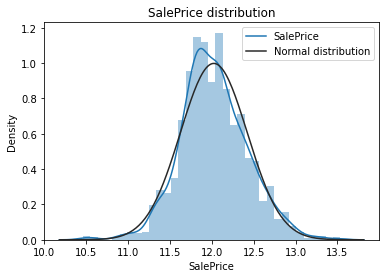

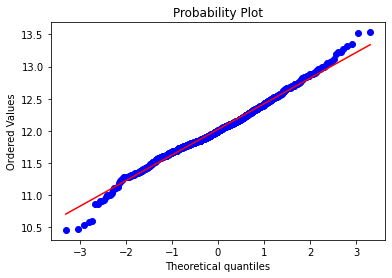

Skewness = 0.12300048281085023 ,Kurtosis = 0.8064983628393168


In [38]:
# log tranform on sale price
df_train['SalePrice'] = np.log(df_train[['SalePrice']])

# re-check the histogram and QQ-plot
_ = sns.distplot(df_train['SalePrice'], fit = norm)
plt.title('SalePrice distribution')
plt.legend(['SalePrice','Normal distribution'])

fig = plt.figure()
_= stats.probplot(df_train['SalePrice'], plot = plt)

plt.show()

print('Skewness =', df_train.SalePrice.skew(),',Kurtosis =',df_train.SalePrice.kurt())

The sale price distribution is close to normal now

### Categorical variables
We can now convert categorical varibles into dummy variables in order to use them for the later on modeling stage. Before doing that, it actually makes more sense to convert some numerical variables in the categorical variables. Let's do that first

In [39]:
# Take a look at the data type for different variables again

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1457 non-null   int64  
 1   MSZoning       1457 non-null   object 
 2   LotFrontage    1457 non-null   float64
 3   LotArea        1457 non-null   int64  
 4   Street         1457 non-null   object 
 5   Alley          1457 non-null   object 
 6   LotShape       1457 non-null   object 
 7   LandContour    1457 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1457 non-null   object 
 10  LandSlope      1457 non-null   object 
 11  Neighborhood   1457 non-null   object 
 12  Condition1     1457 non-null   object 
 13  Condition2     1457 non-null   object 
 14  BldgType       1457 non-null   object 
 15  HouseStyle     1457 non-null   object 
 16  OverallQual    1457 non-null   int64  
 17  OverallCond    1457 non-null   int64  
 18  YearBuil

In [40]:
# list of variables that should be categorical variables

to_cat = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']
df_train[to_cat] = df_train[to_cat].astype('str')

Do one hot enconding to convert categorical variables into dummy variables

In [41]:
# One hot encoding
df_train = pd.get_dummies(df_train)

In [42]:
# check the shape of the new df_train
print(df_train.shape)
df_train.head().T

(1457, 616)


,0,1,2,3,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450.0,9600.0,11250.0,9550.0,14260.0
MasVnrArea,196.0,0.0,162.0,0.0,350.0
BsmtFinSF1,706.0,978.0,486.0,216.0,655.0
BsmtFinSF2,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
SaleCondition_AdjLand,0.0,0.0,0.0,0.0,0.0
SaleCondition_Alloca,0.0,0.0,0.0,0.0,0.0
SaleCondition_Family,0.0,0.0,0.0,0.0,0.0
SaleCondition_Normal,1.0,1.0,1.0,0.0,1.0
